### Основы описательной статистики, виды распределений в Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

### 1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

In [2]:
x=np.random.randn(1000)
y=np.random.randn(1000)
sigma1=np.std(x)
mu1=np.mean(x)
sigma2=np.std(y)
mu2=np.mean(y)

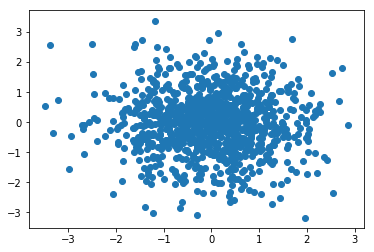

In [3]:
plt.scatter(x,y)

In [4]:
# Дисперсия
np.var(x)

1.0044089301243633

In [5]:
# Стандратное отклонение
np.std(x)

1.0022020405708438

Пример из лекции, сохранил для истории

mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

зададим нормально распределенную случайную величину

norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

сгенерируем 1000 значений

x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

### 2.Нарисовать плотность распределения полученной выборки x.

In [6]:
df_x=pd.DataFrame(data=x, columns=['x'])
df_y=pd.DataFrame(data=y, columns=['y'])
df=pd.concat([df_x,df_y],axis=1)
df.head()


,x,y
0,0.398167,-2.331515
1,-1.442391,-0.138383
2,0.390393,-0.645161
3,-0.495271,-0.277465
4,-0.919839,1.258519


C:\Users\89517_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


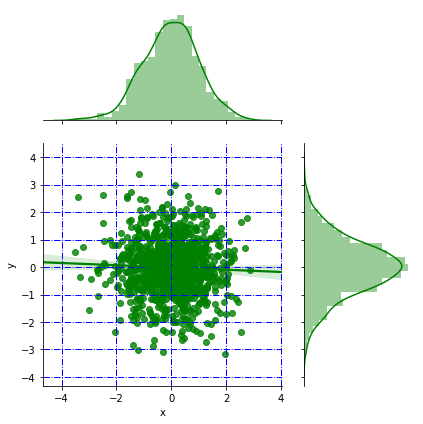

In [7]:
sns.jointplot(x='x', y='y', data=df, kind='reg', color='g', ratio=2)
plt.grid(color='b', linestyle='-.', linewidth=1)

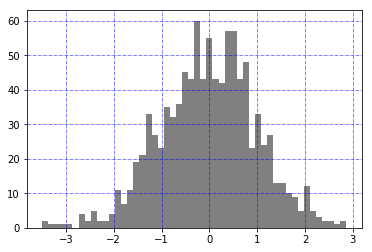

In [12]:
plt.hist(x,bins=50, histtype='bar', color='gray')
plt.grid(color='b', linestyle='-.', linewidth=0.5)

plt.show()

### 3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

In [13]:
X = np.vstack((x, y)).T
X

array([[ 0.39816656, -2.33151546],
       [-1.4423909 , -0.13838302],
       [ 0.39039327, -0.64516108],
       ...,
       [-1.0296992 , -0.79034051],
       [ 1.7870467 , -0.03948772],
       [ 0.01347405,  0.54361446]])

In [14]:
Sx=0.6
Sy=0.1
scale=np.array([[Sx,0],[0,Sy]])
scale

array([[0.6, 0. ],
       [0. , 0.1]])

In [15]:
Y=np.dot(X,scale)
Y

array([[ 0.23889994, -0.23315155],
       [-0.86543454, -0.0138383 ],
       [ 0.23423596, -0.06451611],
       ...,
       [-0.61781952, -0.07903405],
       [ 1.07222802, -0.00394877],
       [ 0.00808443,  0.05436145]])

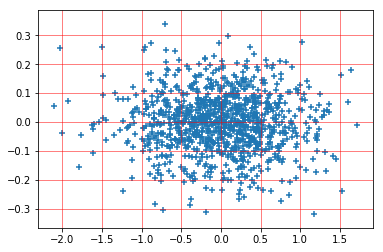

In [16]:
plt.scatter(Y[:,0],Y[:,1], marker='+')
plt.grid(color='r', linestyle='-', linewidth=0.5)

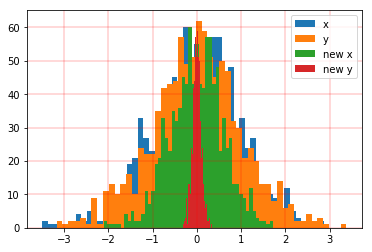

In [17]:
plt.hist(x,50 )
plt.hist(y,50)
plt.hist(Y[:,0],50)
plt.hist(Y[:,1],50)
plt.grid(color='r', linestyle='-', linewidth=0.3)
plt.legend(['x', 'y', 'new x', 'new y'])
plt.show()

### 4. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

-0.04032067405615098


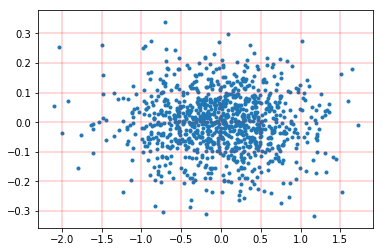

In [18]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(Y[:,0], Y[:,1]) # p-value - вероятность появления значения в случайной выборке
plt.scatter(Y[:,0], Y[:,1], marker='.')
plt.grid(color='r', linestyle='-', linewidth=0.3)
print(corr)

Если у Пирсона знак положительный, то зависимость между значениями прямая. При отрицательном Пирсоне, обратная зависимость. Если Пирсон стремится к нулю, то взаимосвязь отсутствует.

### 5. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

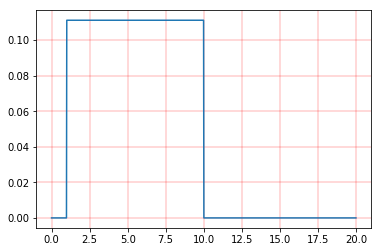

In [20]:
a = 1
b = 10
# задается левая граница и масштаб:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 20, 1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)
plt.grid(color='r', linestyle='-', linewidth=0.3)

### 6. Найти на графике примеры выброса. Что они означают?

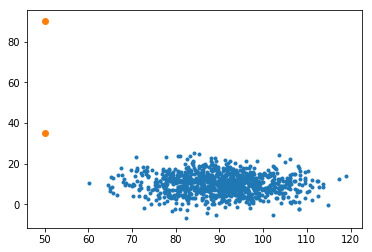

In [35]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

plt.scatter(x, y, marker='.')
plt.scatter([50,50], [35,90]) # задал вручную явные выбросы

Оранджевым выделены примеры выбросов. В статистике результат измерения, выделяющийся из общей выборки. Статистический метод, способный действовать в условиях выбросов, называется робастным.

### 7. Найти корелляцию в следующих данных:

In [95]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url).head(300)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import seaborn as sns

In [97]:
data=df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']]
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69


In [112]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags'])
scaled_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1.256173,-1.003091,-0.605192,-0.619814,-0.538499,-0.993527,-0.921648,-0.549022
1,1.399818,-1.037109,-0.607998,-0.668001,-0.537912,-0.980614,-0.908754,-0.548526
2,-1.616722,-0.806886,-0.607066,-0.351317,-0.533746,-1.002334,-0.930647,-0.547866
3,-0.539386,-0.949461,-0.604455,-0.533800,-0.537089,-1.039608,-0.968551,-0.544285
4,0.897061,-1.051056,-0.605929,-0.671930,-0.536905,-1.033655,-0.963601,-0.536810


In [107]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']])
df_norm = pd.DataFrame(np_scaled, columns=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags'])
df_norm.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,0.704545,0.024541,0.000953,0.069879,0.000319,0.022952,0.030691,0.001778
1,0.727273,0.014861,0.000297,0.056665,0.000440,0.026238,0.033990,0.001859
2,0.250000,0.080372,0.000515,0.143508,0.001303,0.020712,0.028389,0.001967
3,0.420455,0.039802,0.001126,0.093466,0.000611,0.011229,0.018692,0.002551
4,0.647727,0.010893,0.000781,0.055587,0.000649,0.012743,0.019958,0.003770


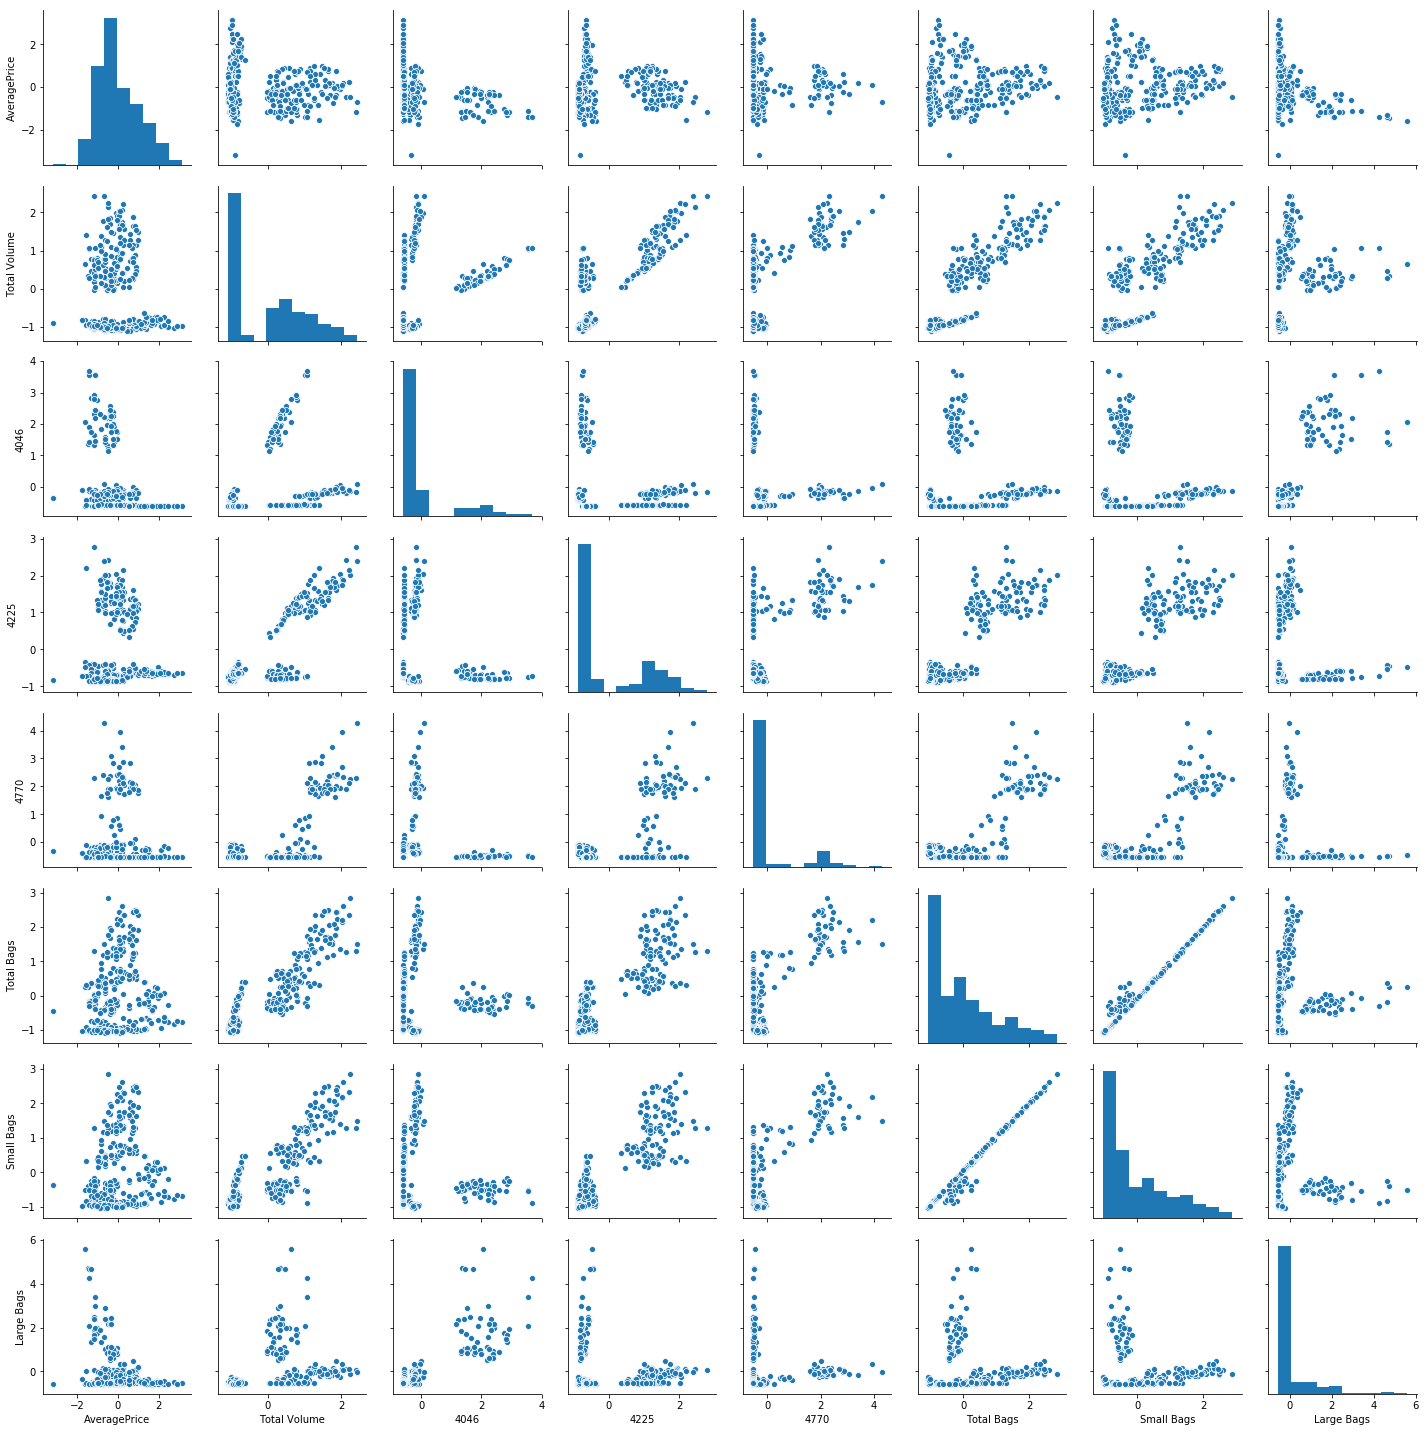

In [100]:
sns.pairplot(scaled_df)

In [101]:
from scipy.stats import pearsonr

In [102]:
df_norm['Total Volume'].isna().sum()

0

In [103]:
df_norm['Total Bags'].isna().sum()

0

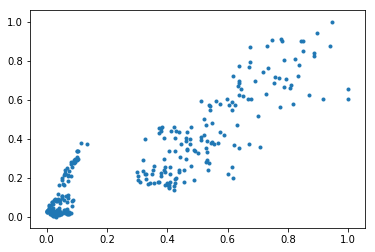

In [108]:
X = df_norm['Total Volume']
Y = df_norm['Total Bags']

plt.scatter(X, Y, marker='.')


In [109]:
corr, p-value = pearsonr(X, Y)

SyntaxError: can't assign to operator (<ipython-input-109-75334aed15fa>, line 1)

In [110]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']])
df_norm = pd.DataFrame(np_scaled, columns=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags'])
print(df_norm[:5])

   AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0      0.704545      0.024541  0.000953  0.069879  0.000319    0.022952   
1      0.727273      0.014861  0.000297  0.056665  0.000440    0.026238   
2      0.250000      0.080372  0.000515  0.143508  0.001303    0.020712   
3      0.420455      0.039802  0.001126  0.093466  0.000611    0.011229   
4      0.647727      0.010893  0.000781  0.055587  0.000649    0.012743   

   Small Bags  Large Bags  
0    0.030691    0.001778  
1    0.033990    0.001859  
2    0.028389    0.001967  
3    0.018692    0.002551  
4    0.019958    0.003770  


0.8933594407777292


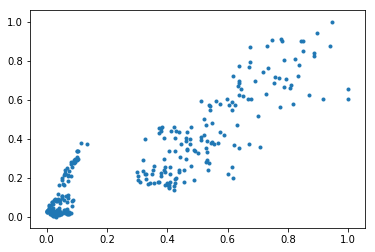

In [111]:
X_4046 = df_norm['Total Volume']
Y_avgPrice = df_norm['Total Bags']

corr, p_value = pearsonr(X_4046, Y_avgPrice)
plt.scatter(X_4046, Y_avgPrice, marker='.')
print(corr)